# EDA and Initial Insights

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
import shap

In [4]:
# Load dataset
file_path = "C:/Users/ghaza/Desktop/FYP/Application/AI/data/raw/Ampule Washing Data.csv"
data = pd.read_csv(file_path)

# Display dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174954 entries, 0 to 174953
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Hydraulic_Pressure             150461 non-null  float64
 1   Coolant_Pressure               159209 non-null  float64
 2   Ambient_Temperature            174954 non-null  float64
 3   Voltage                        164457 non-null  float64
 4   Humidity                       155710 non-null  float64
 5   Air_System_Pressure            157459 non-null  float64
 6   Coolant_Temperature            157459 non-null  float64
 7   Hydraulic_Oil_Temperature      162708 non-null  float64
 8   Water_Flow_Rate                157459 non-null  float64
 9   Water_Temperature              155710 non-null  float64
 10  Detergent_Level                164457 non-null  float64
 11  Spray_Pressure                 159209 non-null  float64
 12  Vibration                     

## Step 1: Data Profiling
### Identifying the number of rows, columns, data types, missing values, and summary statistics.

In [6]:
# Generate data profiling information
profile_report = {
    "Shape": data.shape,
    "Column Names": data.columns.tolist(),
    "Data Types": {col: str(dtype) for col, dtype in data.dtypes.items()},
    "Missing Values": data.isnull().sum().to_dict(),
    "Unique Values": data.nunique().to_dict(),
    "Basic Statistics": data.describe(include='all').to_dict()
}

### Display the profile report
#### 1. Shape: The number of rows and columns in the dataset.

In [8]:
print(f"Shape of the Dataset: {profile_report['Shape']}\n")

Shape of the Dataset: (174954, 18)



#### 2. Column Names and Data Types: Lists all columns with their corresponding data types.

In [10]:
# Correct the creation of the DataFrame
print("Column Names and Data Types:")
column_df = pd.DataFrame({
    "Column Names": profile_report['Column Names'],
    "Data Types": profile_report['Data Types'].values()
})
display(column_df)

Column Names and Data Types:


,Column Names,Data Types
0,Hydraulic_Pressure,float64
1,Coolant_Pressure,float64
2,Ambient_Temperature,float64
3,Voltage,float64
4,Humidity,float64
5,Air_System_Pressure,float64
6,Coolant_Temperature,float64
7,Hydraulic_Oil_Temperature,float64
8,Water_Flow_Rate,float64
9,Water_Temperature,float64


#### 3. Missing Values: Displays the count of missing values for each column.

In [12]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Create a DataFrame to display missing values
missing_df = pd.DataFrame({
    'Column': data.columns,
    'Missing Values': missing_values,
}).sort_values(by='Missing Values', ascending=False)

#Missing values per column
print("\nMissing Values:")
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
}).sort_values(by='Missing Values', ascending=False)
display(missing_df)


Missing Values:


,Missing Values
Hydraulic_Pressure,24493
Humidity,19244
Motor_Current,19244
Water_Temperature,19244
Air_System_Pressure,17495
Coolant_Temperature,17495
Water_Flow_Rate,17495
Coolant_Pressure,15745
Spray_Pressure,15745
Pressure_Stability_Index,15745


#### 4. Basic Statistics

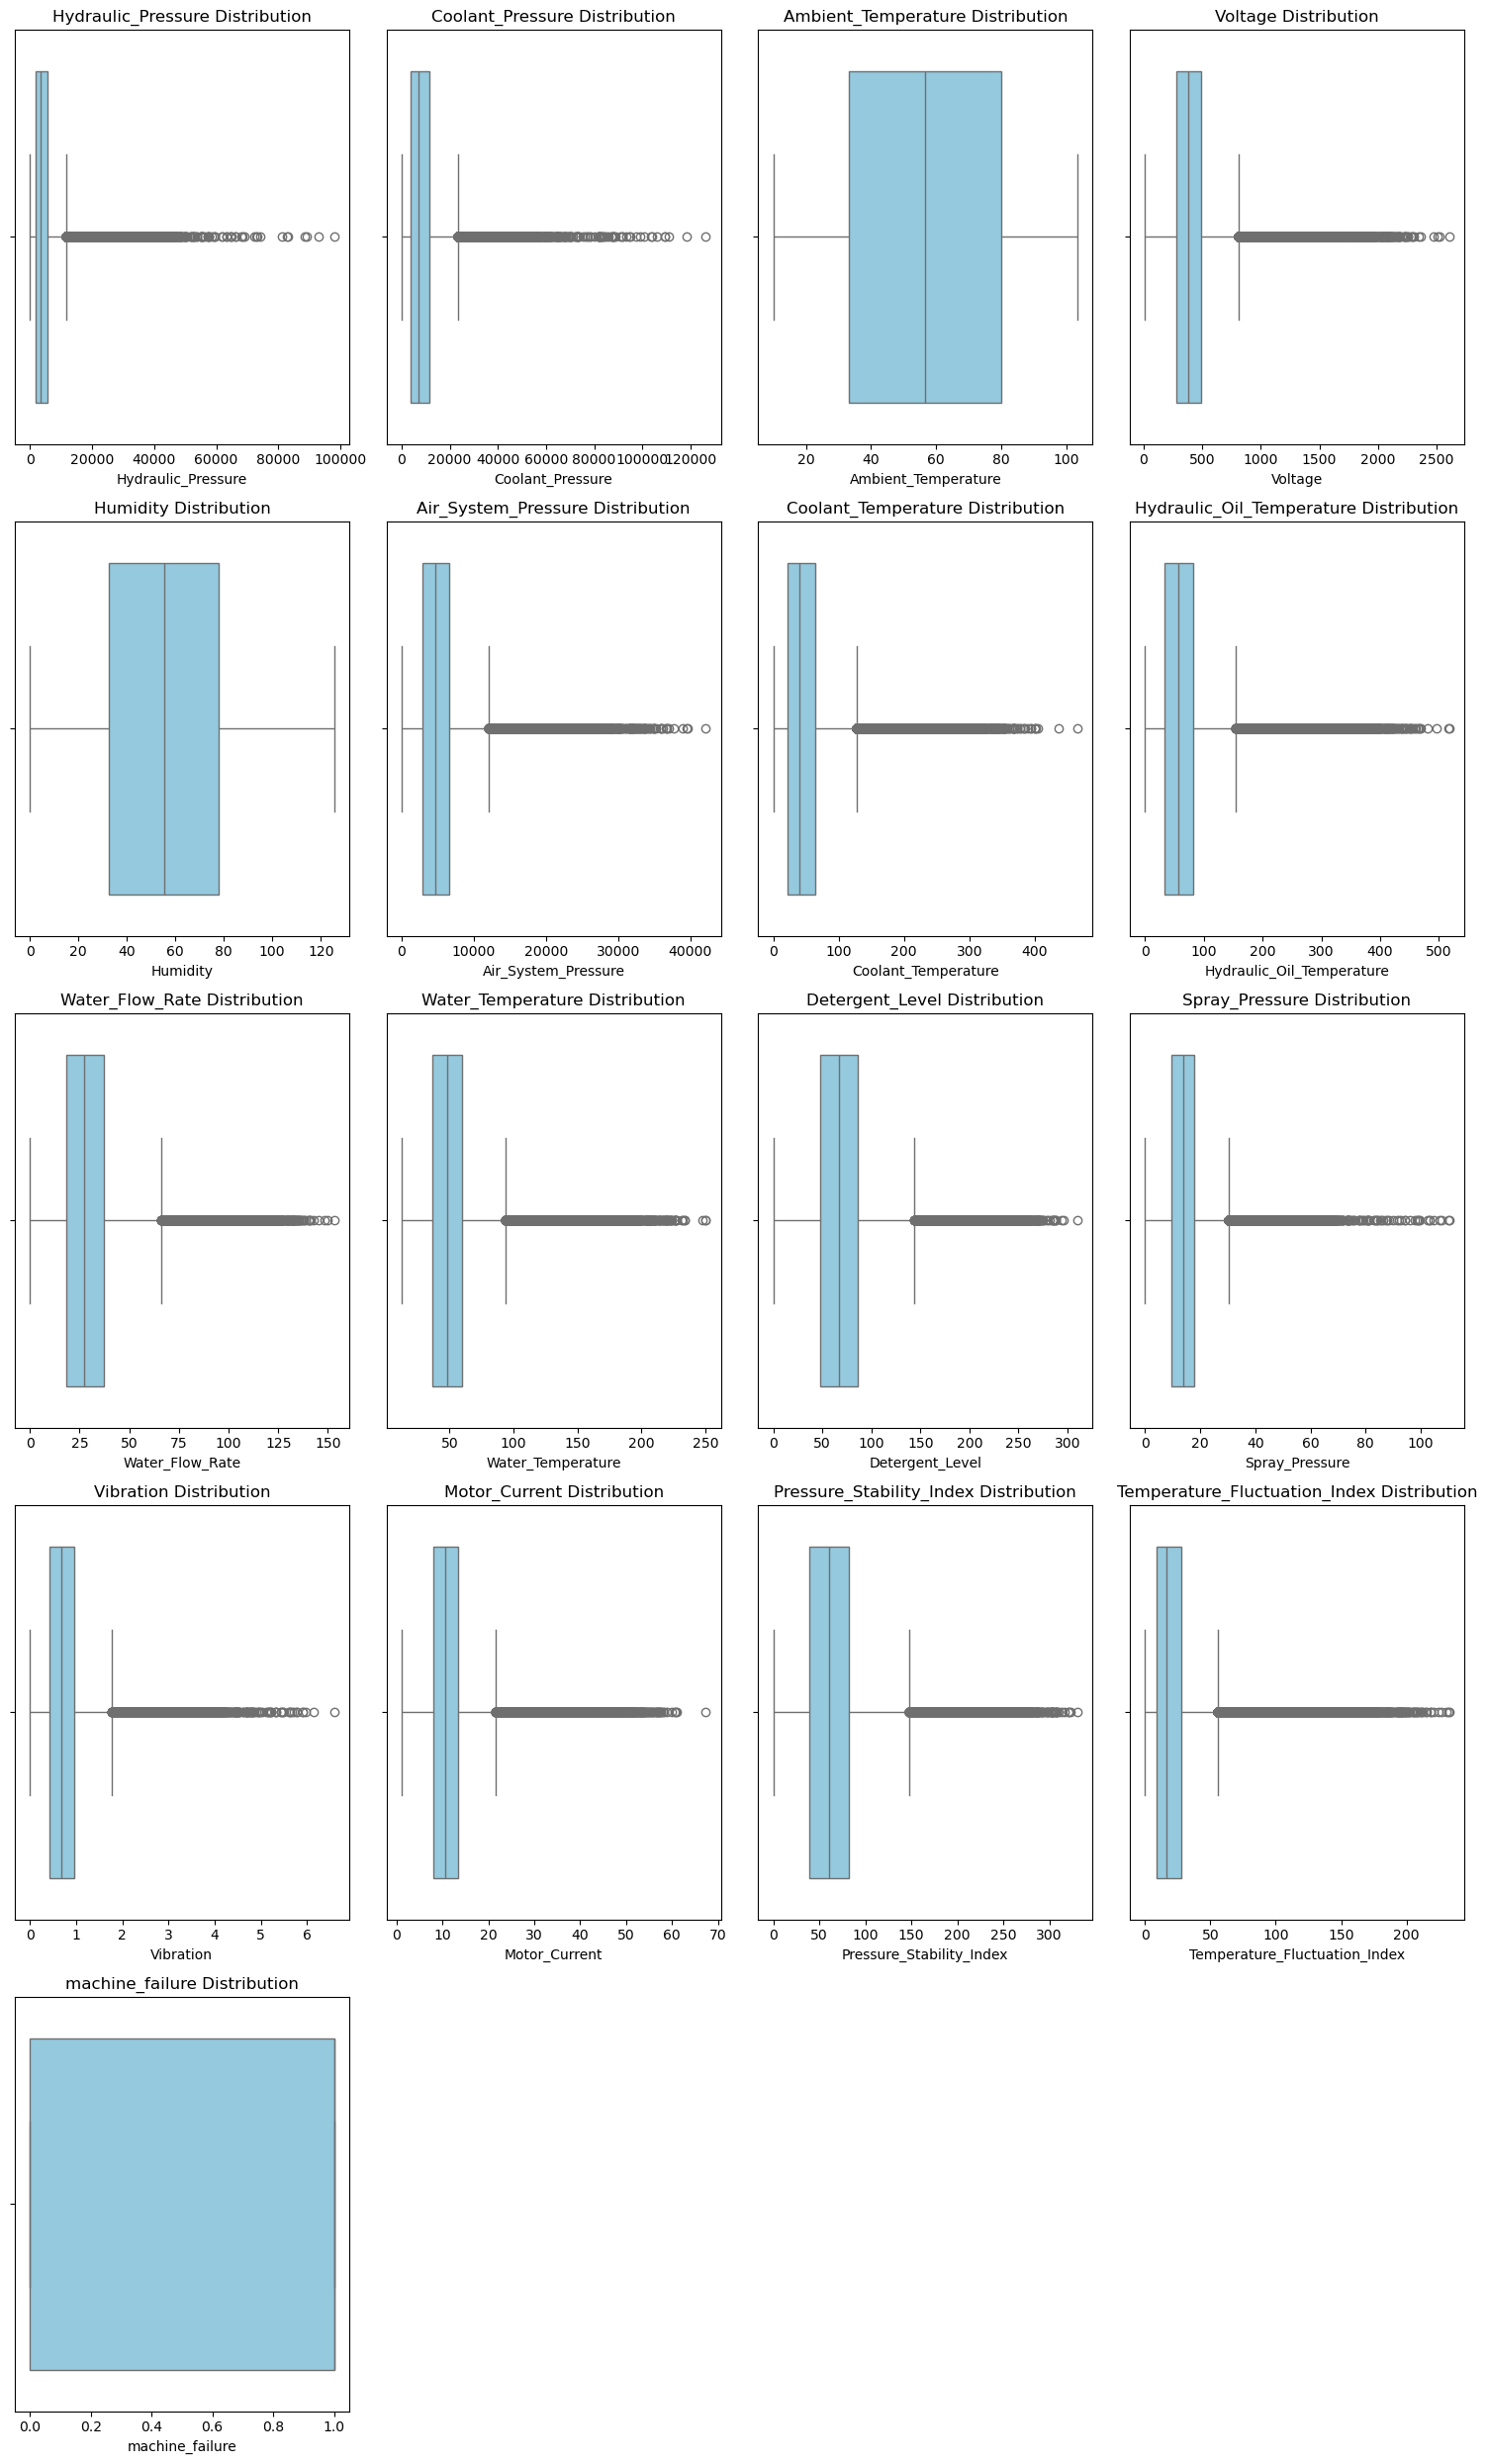

In [14]:
# Visualization: Summary Statistics (Boxplots)
# Calculate number of numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns needed
num_columns = 4  # Fixed number of columns
num_rows = math.ceil(len(numeric_columns) / num_columns)  # Dynamically calculate rows

# Create subplots
plt.figure(figsize=(15, 5 * num_rows))  # Adjust height dynamically
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f"{col} Distribution")
    plt.tight_layout()

plt.show()

#### 5. Check for Anomalies: 'machine_failure' is NaN, 'failure_type' is 'No Failure' but 'machine_failure' is 1

In [16]:
# 1. Check where 'machine_failure' is NaN
machine_failure_na = data[data['machine_failure'].isna()]
print("\nRows with Missing 'machine_failure':")
display(machine_failure_na)


Rows with Missing 'machine_failure':


,Hydraulic_Pressure,Coolant_Pressure,Ambient_Temperature,Voltage,Humidity,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Water_Flow_Rate,Water_Temperature,Detergent_Level,Spray_Pressure,Vibration,Motor_Current,Pressure_Stability_Index,Temperature_Fluctuation_Index,failure_type,machine_failure


In [17]:
# 2. Check where'failure_type' is 'No Failure' but 'machine_failure' is 1
anomaly_failure = data[(data['failure_type'] == 'No Failure') & (data['machine_failure'] == 1)]
print("\nRows with 'No Failure' but 'machine_failure' = 1:")
display(anomaly_failure)


Rows with 'No Failure' but 'machine_failure' = 1:


,Hydraulic_Pressure,Coolant_Pressure,Ambient_Temperature,Voltage,Humidity,Air_System_Pressure,Coolant_Temperature,Hydraulic_Oil_Temperature,Water_Flow_Rate,Water_Temperature,Detergent_Level,Spray_Pressure,Vibration,Motor_Current,Pressure_Stability_Index,Temperature_Fluctuation_Index,failure_type,machine_failure
3,NaN,9571.416572,99.594766,312.497265,27.538232,2800.432218,9.552506,53.169482,43.040007,71.721710,187.570550,13.108391,0.959376,12.977742,29.830664,16.834768,No Failure,1
6,4868.130846,13322.946580,18.549741,442.907846,3.131034,NaN,3.990798,34.781746,27.705365,35.970440,74.390296,23.651330,0.526143,11.284565,159.848524,NaN,No Failure,1
8,3822.425680,1527.636957,43.753778,376.177668,62.141148,2505.718326,113.651213,69.601299,30.136940,27.905792,67.218450,NaN,0.435920,7.272350,50.263395,5.996000,No Failure,1
11,4107.716598,6693.705765,53.051224,236.917535,44.501192,6654.976619,36.605580,18.177629,19.873701,27.272626,33.471695,12.626272,0.150308,22.219442,33.742165,25.740920,No Failure,1
20,5025.828112,17043.941840,10.695411,225.764890,9.354490,7149.494957,17.098551,24.303049,42.244744,NaN,166.750541,16.789969,0.187244,4.714730,66.462026,11.884206,No Failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174941,1509.858530,10037.660860,93.382026,520.952213,70.988482,3221.522600,NaN,55.483615,30.769044,47.047632,55.421475,14.560772,0.723922,8.646437,161.628809,NaN,No Failure,1
174944,6431.541364,10880.151540,88.240258,748.802094,85.867823,4648.018914,15.357356,12.134734,28.170618,47.373468,45.225693,16.202044,0.642546,9.051555,44.165359,12.711816,No Failure,1
174947,5155.864881,5891.649130,69.683754,240.182473,68.634830,2905.361724,74.222858,32.373322,16.847993,59.807330,62.873052,13.983788,1.529083,NaN,52.950574,NaN,No Failure,1
174948,4975.562533,5187.761138,72.481790,228.766216,NaN,3999.435376,36.310058,88.122465,18.964039,54.504461,70.120671,5.196181,0.920724,7.281959,81.741915,NaN,No Failure,1


In [18]:
# Configure visuals
sns.set(style="whitegrid")

## Step 2: Univariate Analysis
### Analyzing the distribution of individual variables

#### 1. Continuous Variables

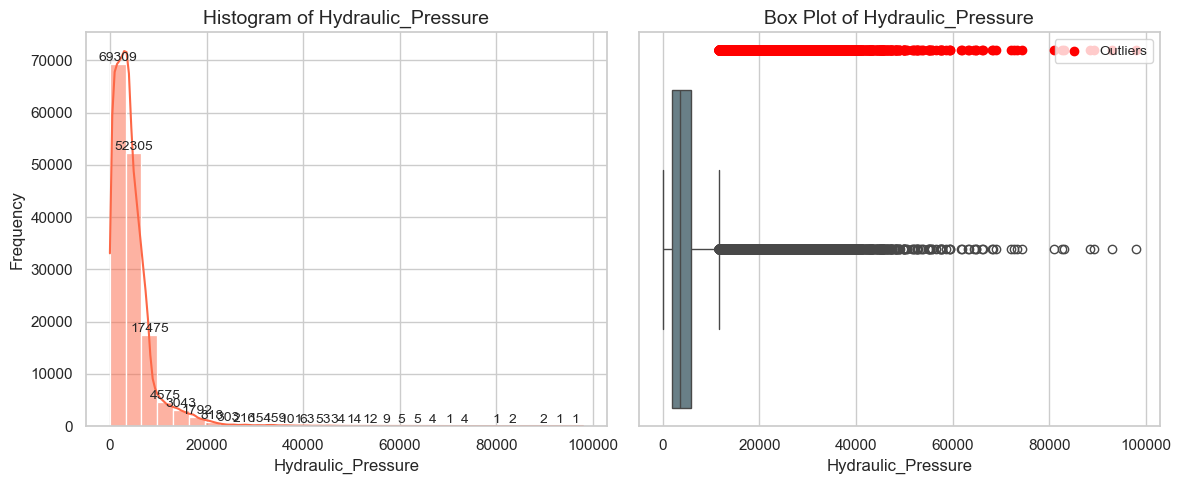

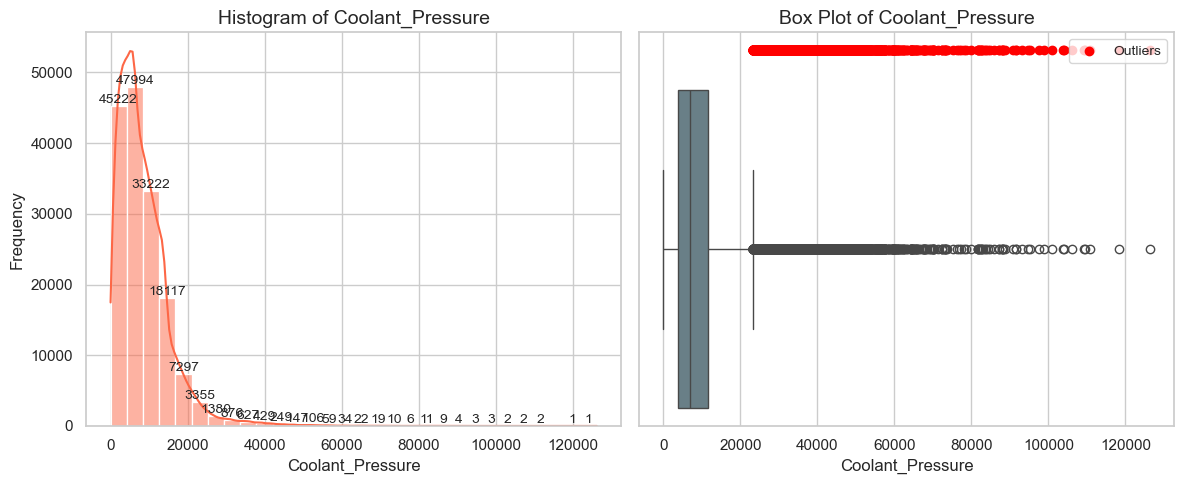

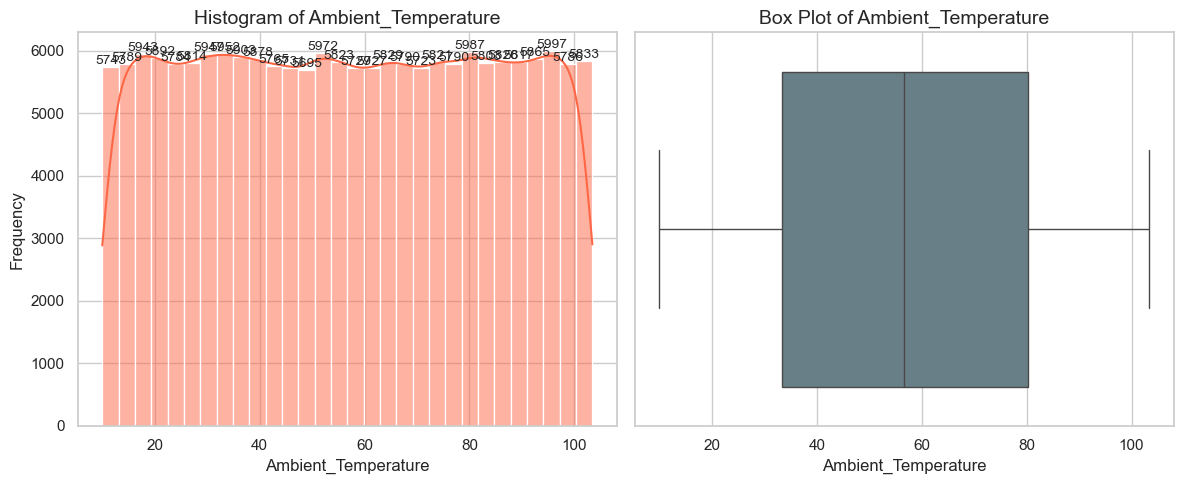

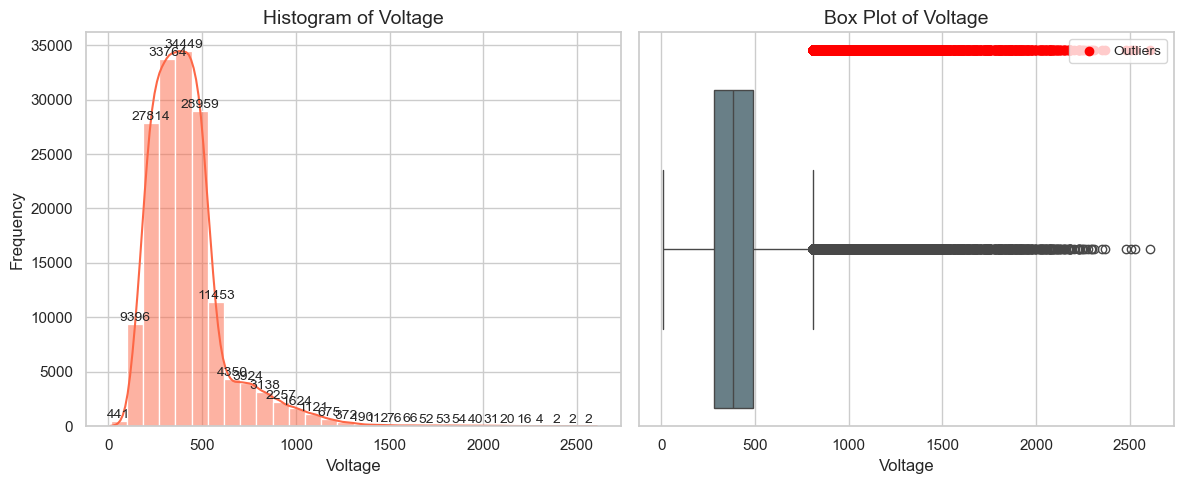

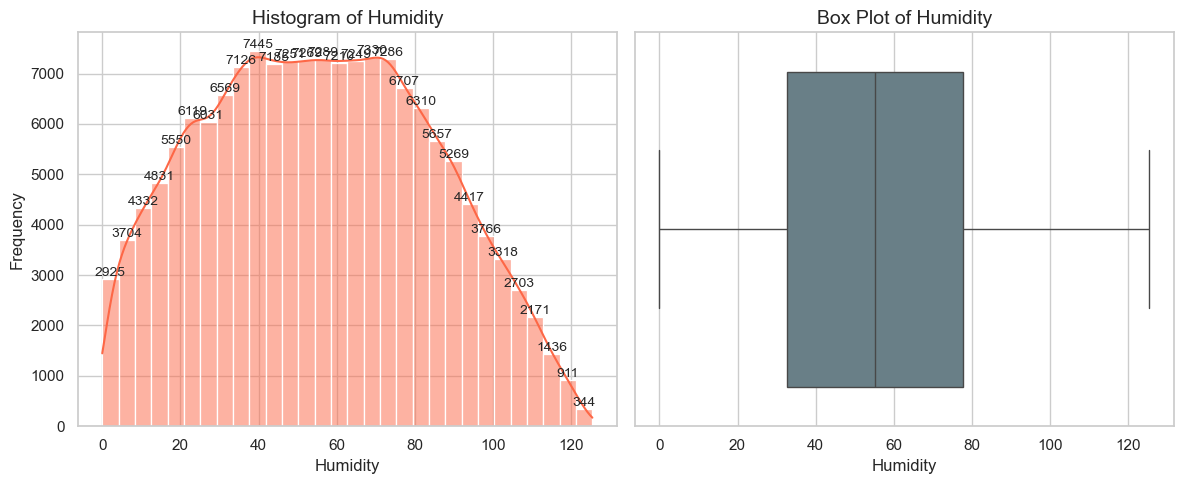

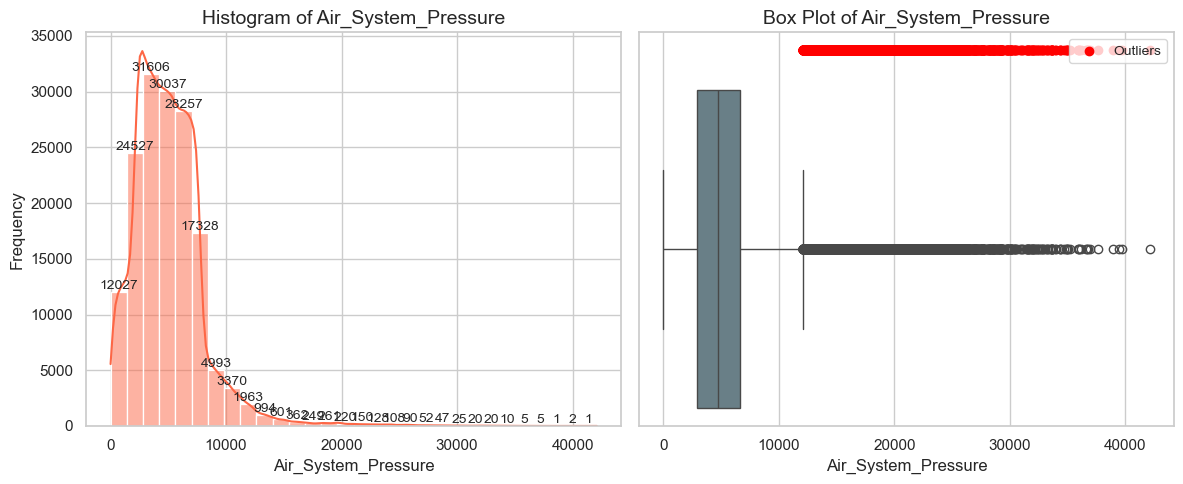

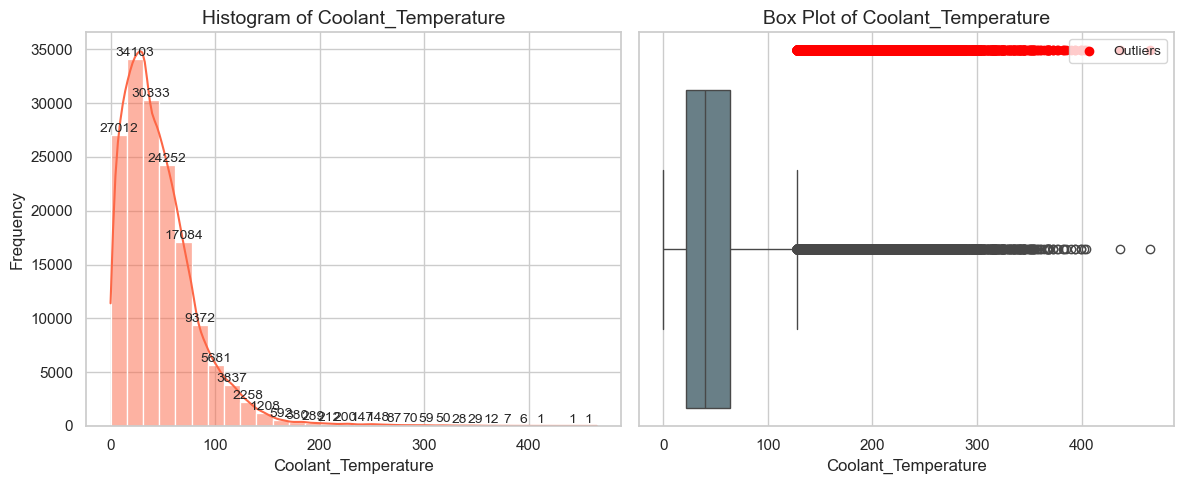

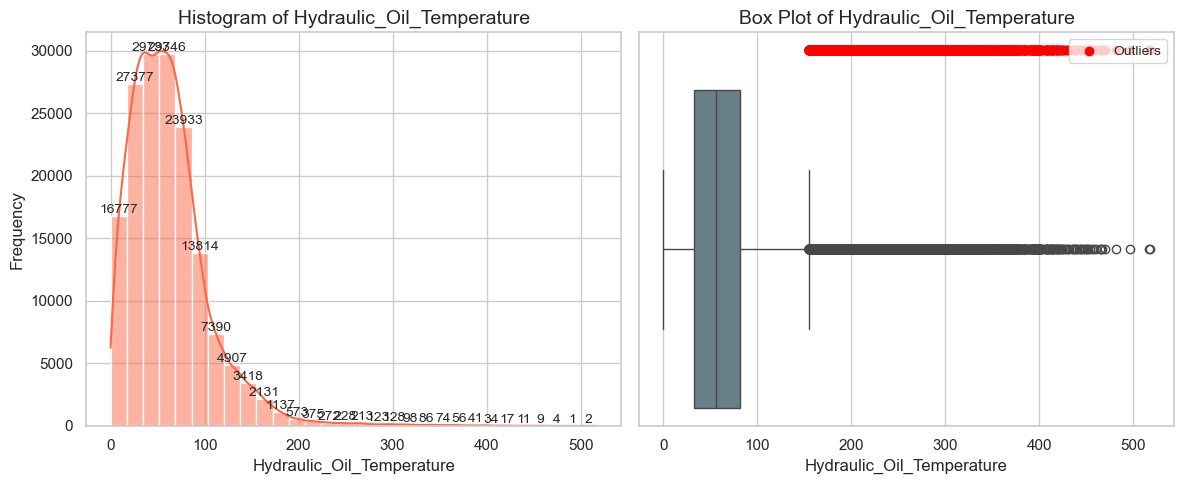

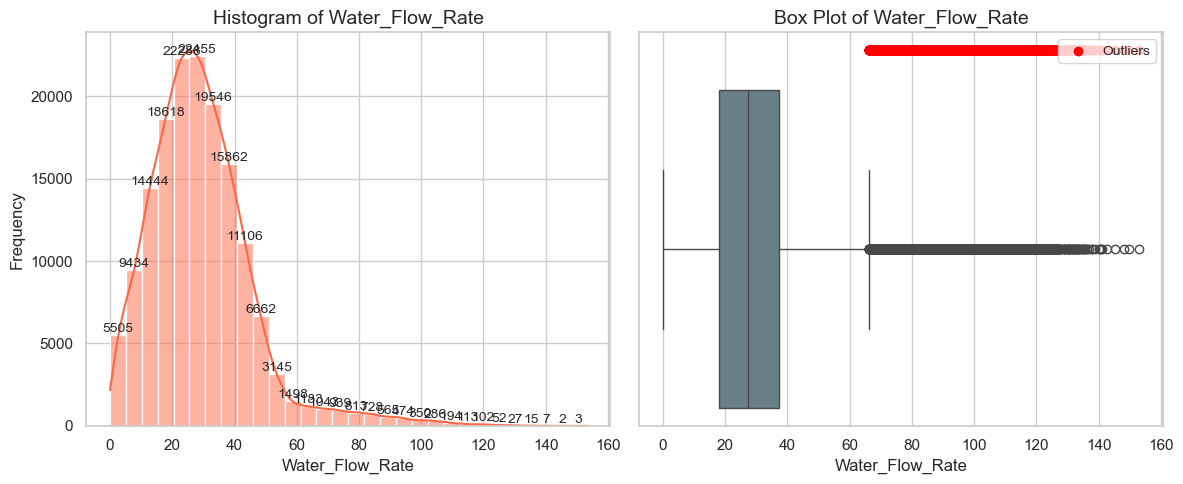

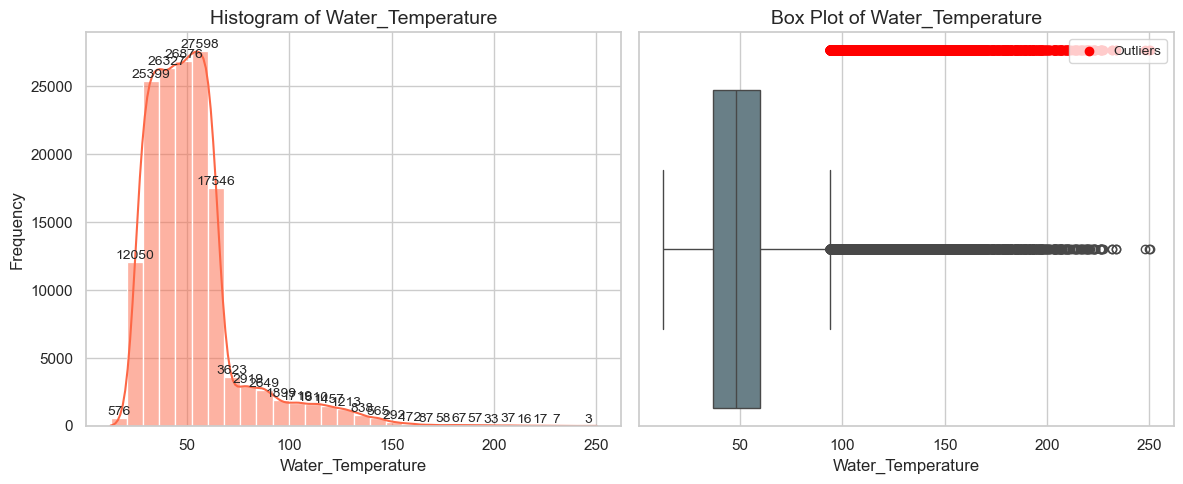

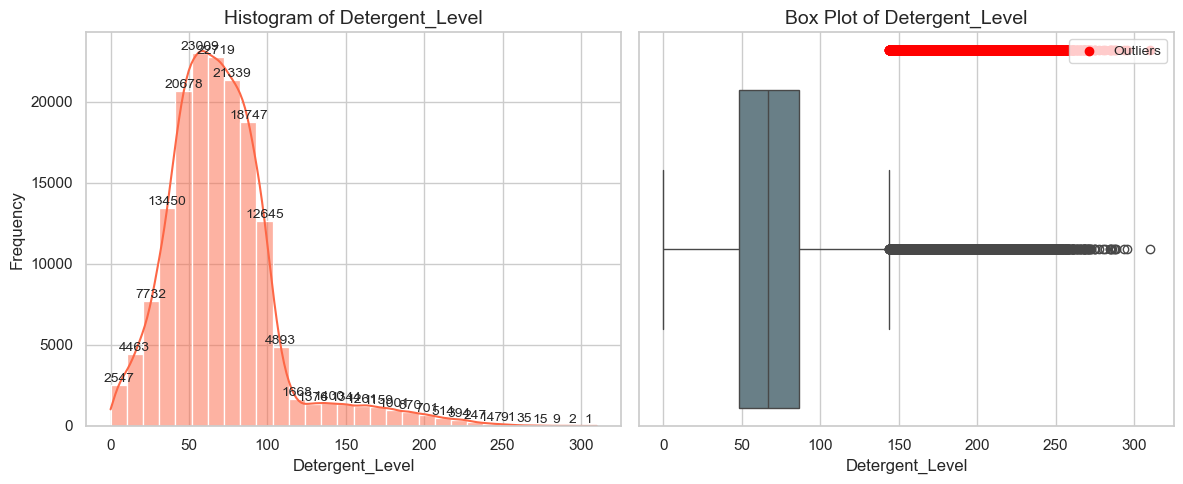

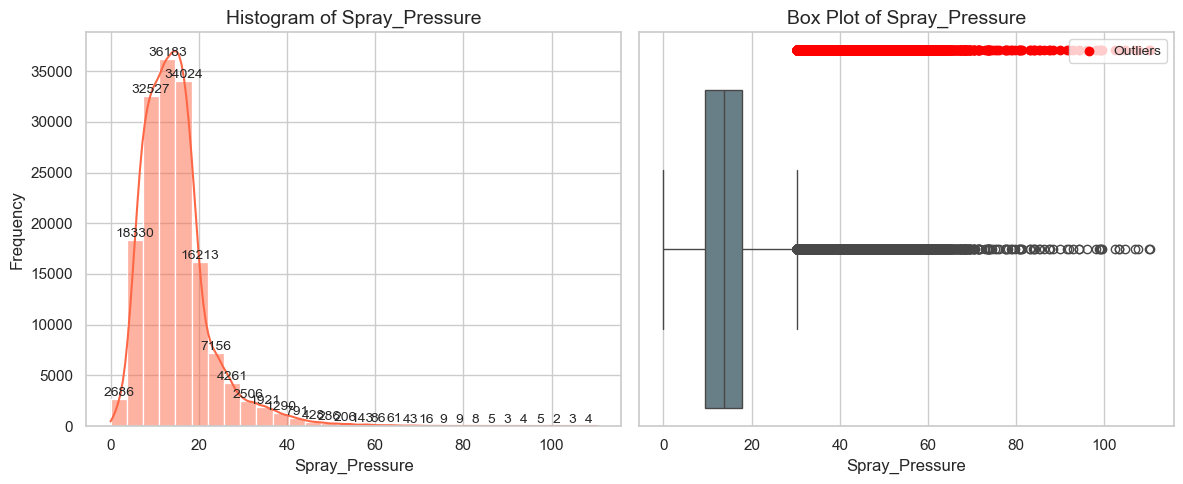

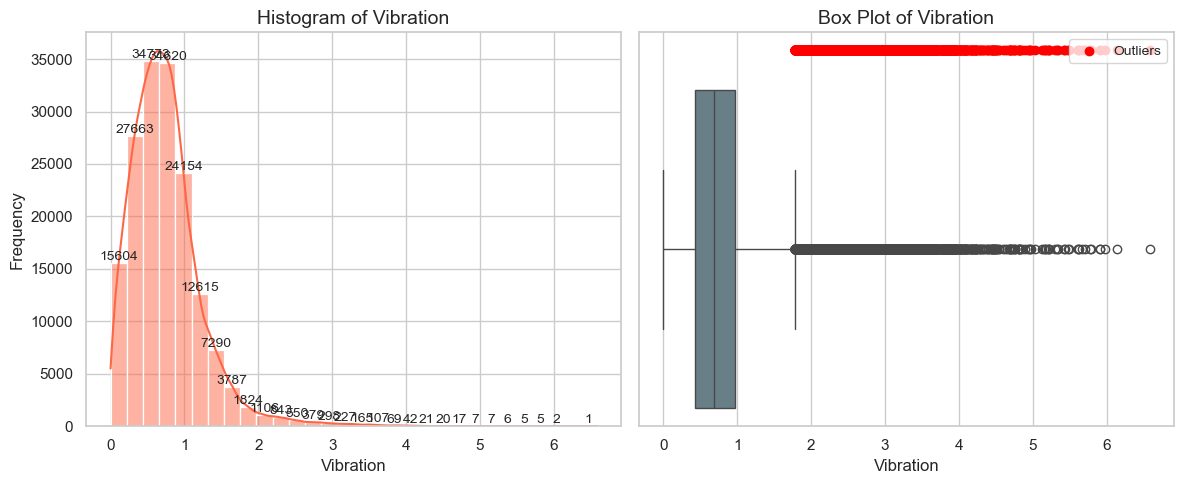

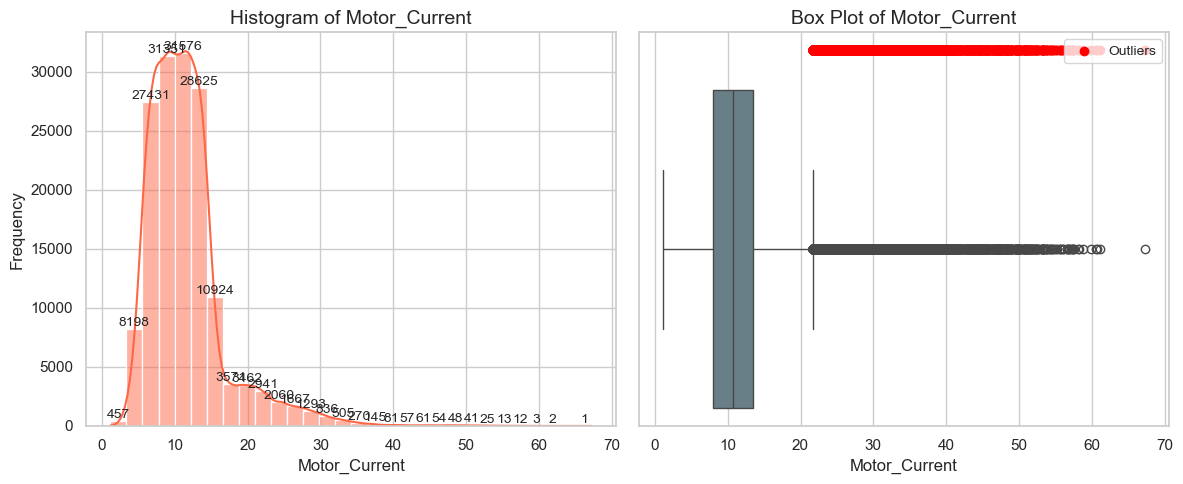

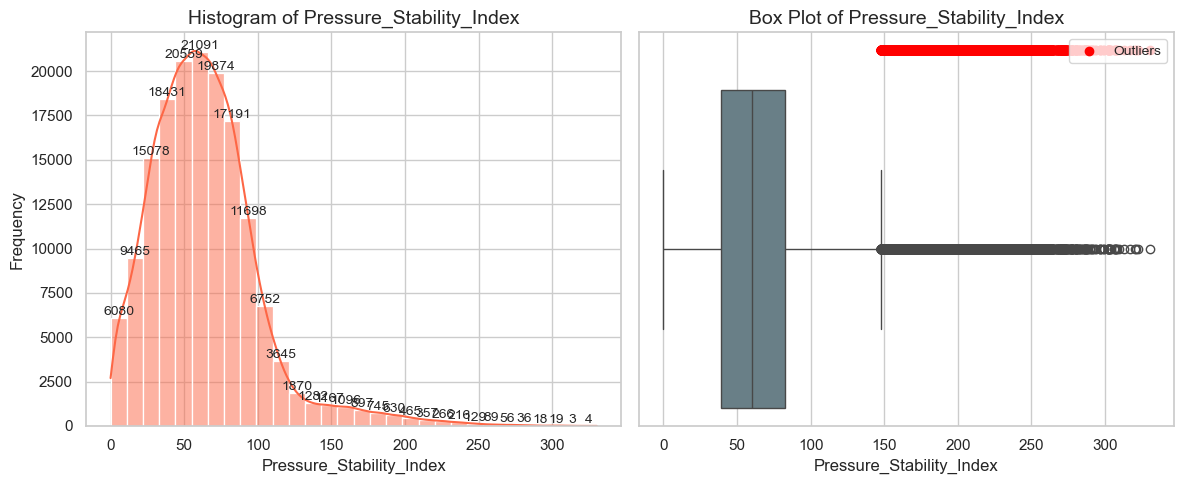

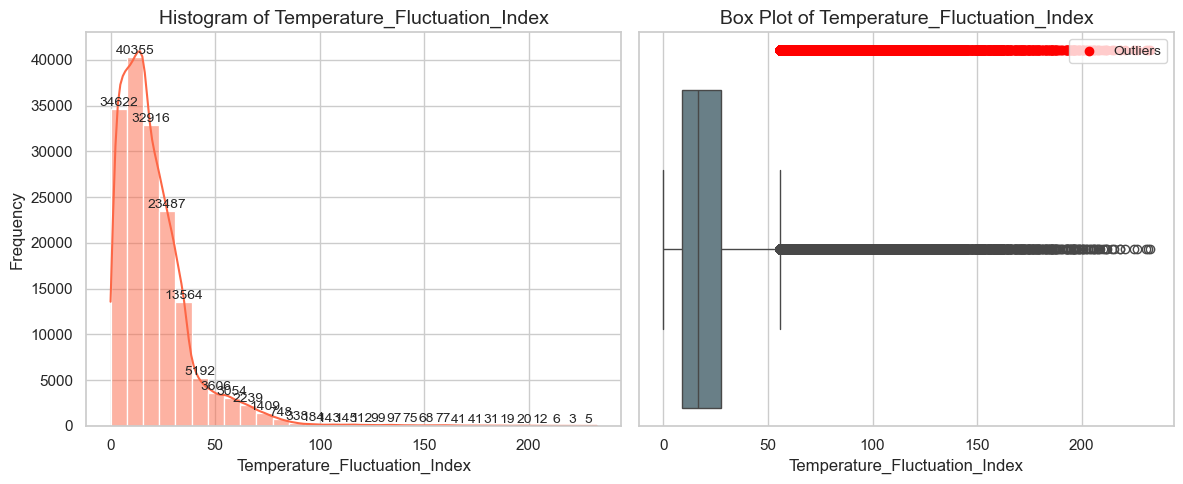

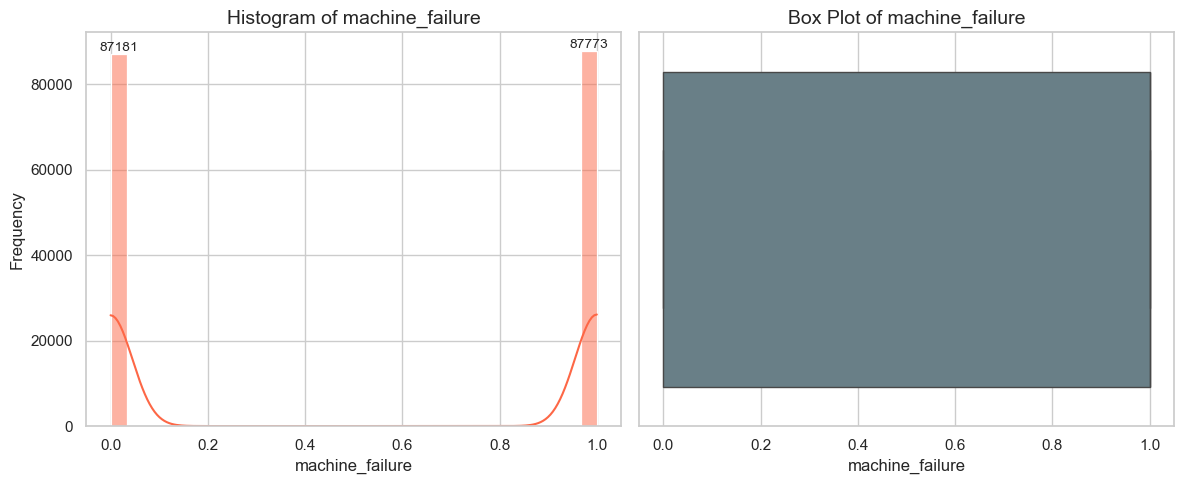

In [21]:
# Identify continuous variables (numeric)
continuous_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Iterate over each continuous variable
for col in continuous_vars:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    ax = sns.histplot(data[col], kde=True, bins=30, color="#fd6746")
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    # Add data labels to histogram bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with non-zero height
            ax.text(
                p.get_x() + p.get_width() / 2, 
                height, 
                f'{int(height)}', 
                ha='center', 
                va='bottom', 
                fontsize=10
            )

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color="#64818c")
    plt.title(f"Box Plot of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)

    # Highlight outliers
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers.empty:
        plt.scatter(
            outliers[col],
            [-0.5] * len(outliers),  # Adjust y-position of outliers
            color="red",
            label="Outliers"
        )
        plt.legend(loc="upper right", fontsize=10)

    plt.tight_layout()
    plt.show()


#### 2.  Distribution of Machine Failure


Distribution of 'machine_failure':


C:\Users\ghaza\AppData\Local\Temp\ipykernel_40132\670911214.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=counts, palette='coolwarm')


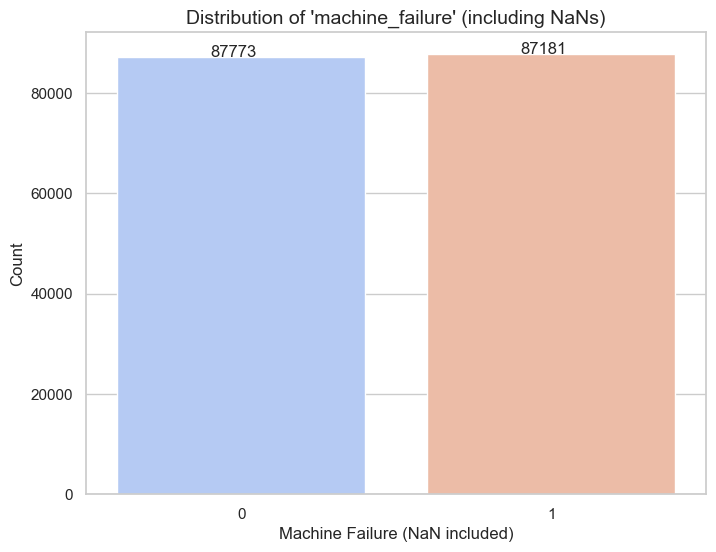

In [23]:
# Distribution of 'machine_failure' with NaN counts
print("\nDistribution of 'machine_failure':")

# Count unique values and NaNs separately
value_counts = data['machine_failure'].value_counts(dropna=False)  # Include NaN values
labels = value_counts.index.tolist()  # Extract unique values (including NaN)
counts = value_counts.values  # Corresponding counts

# Convert NaN in labels to a string for plotting
labels = ['NaN' if pd.isna(label) else label for label in labels]

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels, y=counts, palette='coolwarm')

# Add annotations for each bar (count and NaNs)
for p, count in zip(ax.patches, counts):
    ax.annotate(f"{int(count)}", (p.get_x() + 0.3, p.get_height() + 50), fontsize=12)

# Customize plot
plt.title("Distribution of 'machine_failure' (including NaNs)", fontsize=14)
plt.xlabel("Machine Failure (NaN included)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


#### 3. Distribution of Failure Types


Distribution of Failure Types:


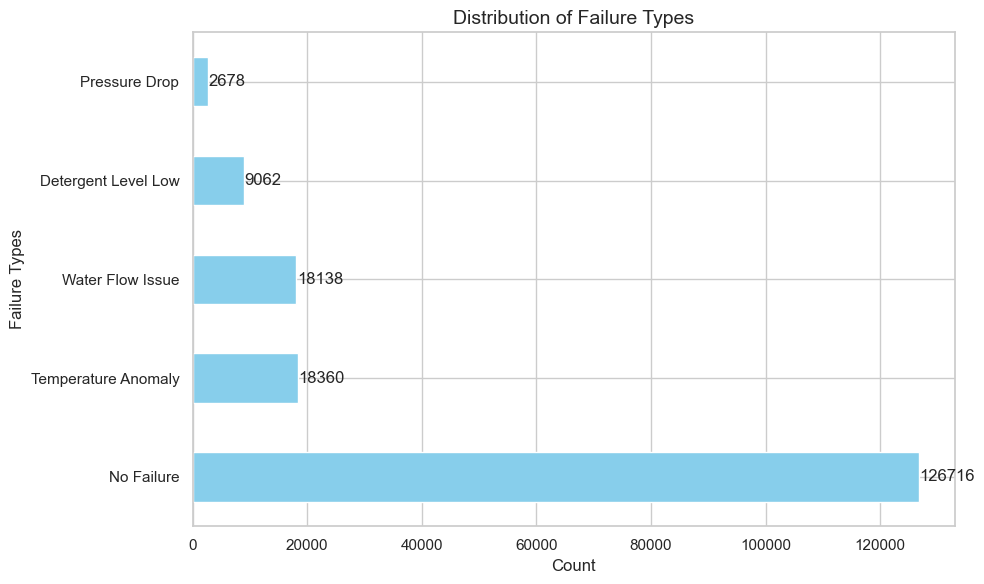

In [25]:
# Distribution of Failure Types
print("\nDistribution of Failure Types:")

# Check if the `failure_type` column exists
if "failure_type" not in data.columns:
    print("Column 'failure_type' does not exist in the dataset. Please check your data.")
else:
    # Count unique failure types including empty or missing values
    failure_counts = data["failure_type"].value_counts(dropna=False)

    # Plot the horizontal bar chart
    plt.figure(figsize=(10, 6))
    ax = failure_counts.plot(kind='barh', color='skyblue')

    # Add data labels
    for i, val in enumerate(failure_counts):
        plt.text(val + 50, i, f"{int(val)}", va="center", fontsize=12)

    # Customize plot
    plt.title("Distribution of Failure Types", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Failure Types", fontsize=12)
    plt.tight_layout()
    plt.show()


## Step 3: Correlation Analysis
### Identifying relationships among numerical variables, highlighting potential dependencies or multicollinearity issues.

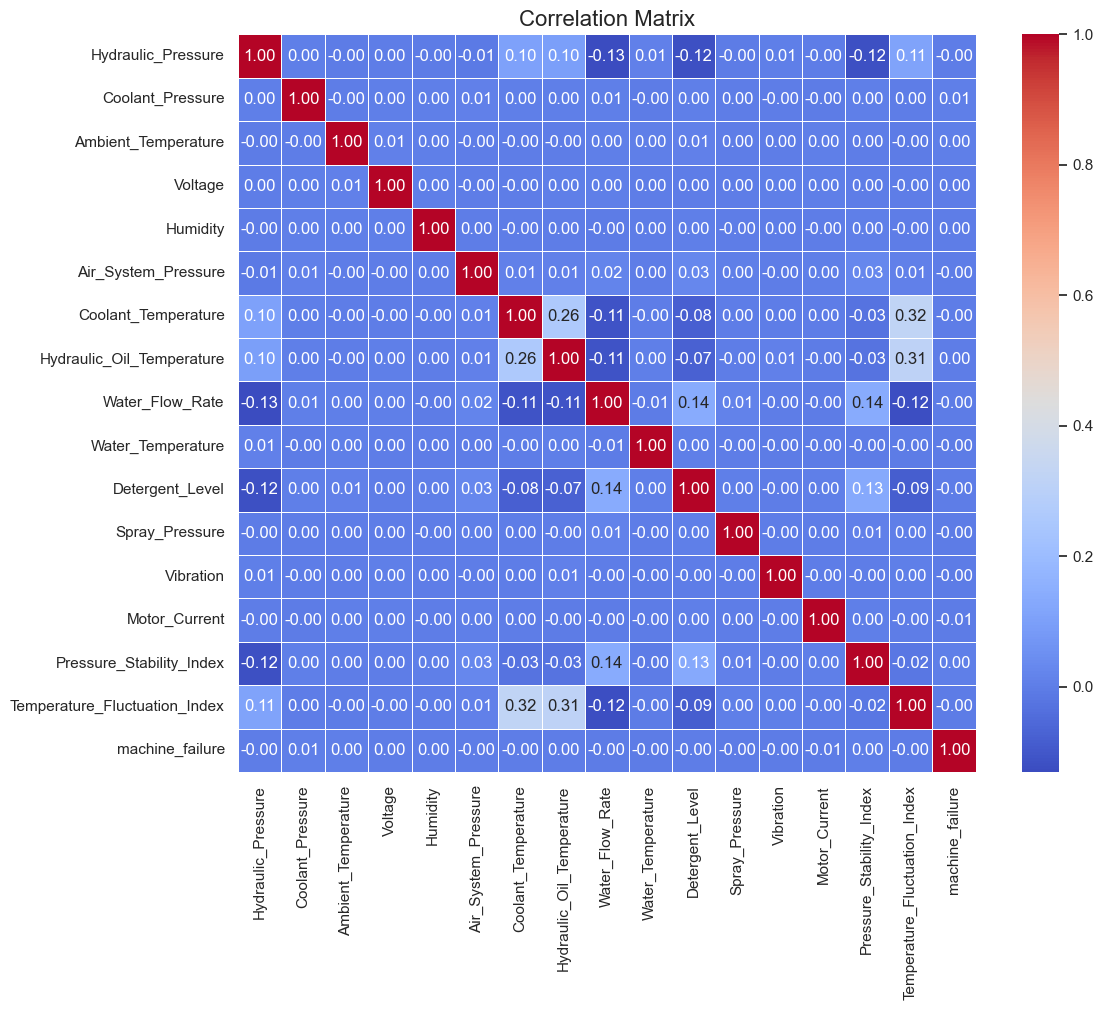

In [37]:
# Select numerical variables
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

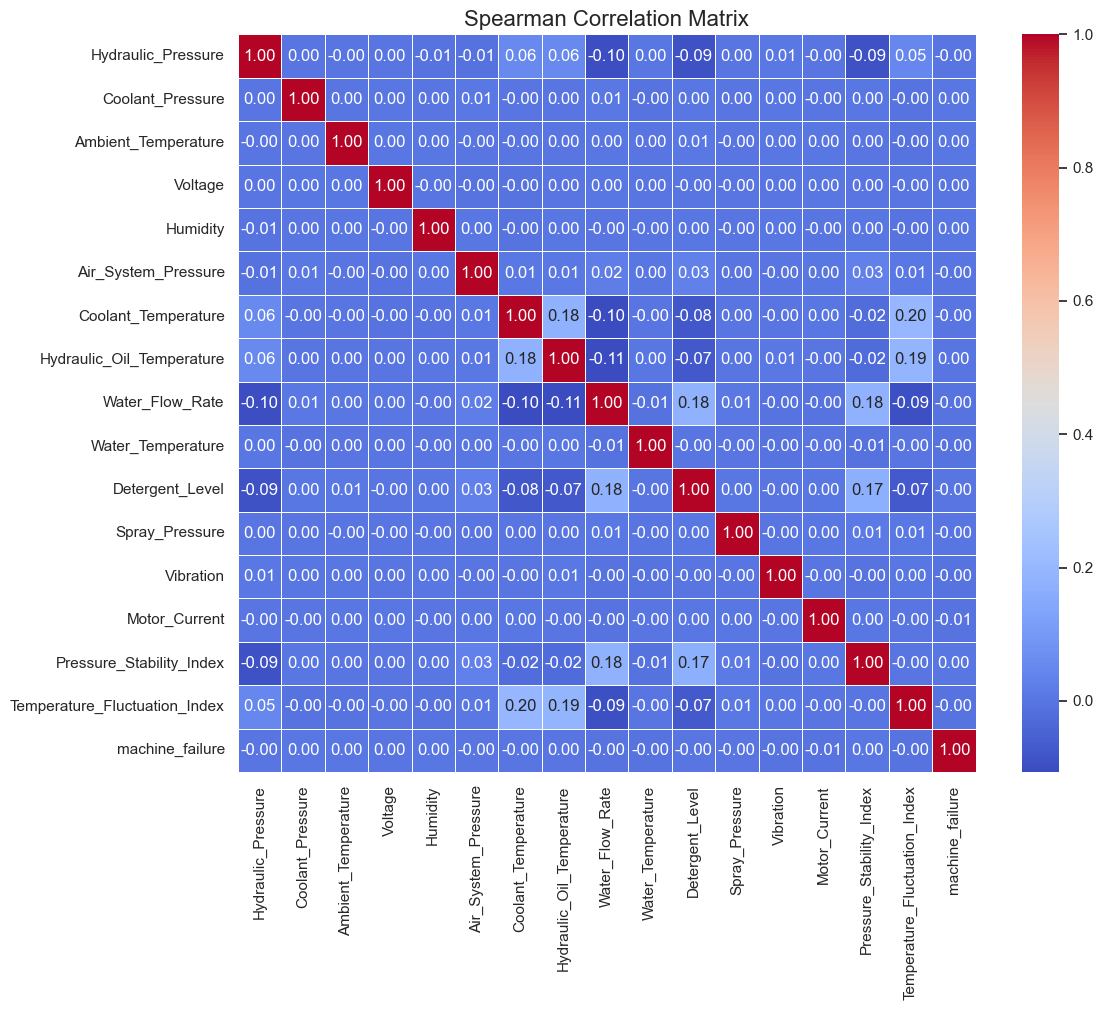

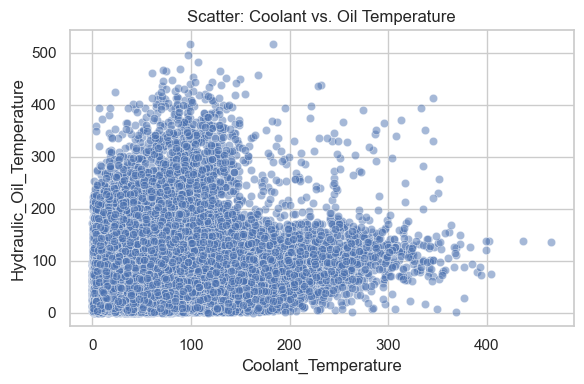

In [38]:
# 2. Compute **Spearman** correlation
spearman_matrix = numeric_data.corr(method='spearman')

# 3. Plot the Spearman matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    spearman_matrix,
    annot=True, fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.title("Spearman Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


# 4. Pick a pair with a moderate Spearman rho (e.g. Coolant_Temp vs Oil_Temp)
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Coolant_Temperature',
    y='Hydraulic_Oil_Temperature',
    data=data,
    alpha=0.5
)
plt.title("Scatter: Coolant vs. Oil Temperature")
plt.xlabel("Coolant_Temperature")
plt.ylabel("Hydraulic_Oil_Temperature")
plt.tight_layout()
plt.show()


machine_failure             0         1
failure_type                           
Detergent Level Low  0.491393  0.508607
No Failure           0.498422  0.501578
Pressure Drop        0.496266  0.503734
Temperature Anomaly  0.501416  0.498584
Water Flow Issue     0.498125  0.501875


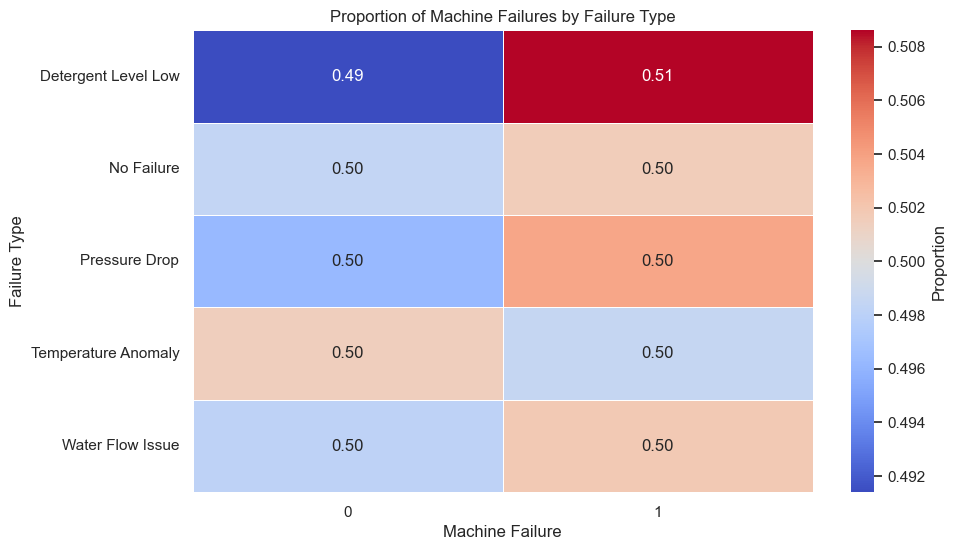

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab of failure_type and machine_failure
failure_mapping = pd.crosstab(data['failure_type'], data['machine_failure'], normalize='index')
print(failure_mapping)

# Heatmap for failure_type vs machine_failure
plt.figure(figsize=(10, 6))
sns.heatmap(
    failure_mapping,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Proportion'},
)
plt.title("Proportion of Machine Failures by Failure Type")
plt.ylabel("Failure Type")
plt.xlabel("Machine Failure")
plt.show()